In [308]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

In [309]:
# #get total data and select koch and rubkkona

# df = pd.read_csv('data/food_crises_cleaned.csv', parse_dates=['date'])
# display(df.columns)
# df.head()

# df_rubkona = df.loc[df['district'] == "Rubkona"]
# df_koch = df.loc[df['district'] == "Koch"]

# df_rubkona = df_rubkona.fillna(method='ffill')
# df_rubkona = df_rubkona.fillna(method='bfill')
# df_koch = df_koch.fillna(method='ffill')
# df_koch = df_koch.fillna(method='bfill')

In [310]:
# #which variables to look at (granger)
# variables = ['ndvi_mean', 'ndvi_anom','rain_mean', 'rain_anom', 'et_mean', 'et_anom', 'count_violence','sum_fatalities','food_price_idx']
# lag = 12 #maximum lag for granger

In [311]:
# #rubkona
# for variable in variables:
#     print(variable)
#     grangercausalitytests(df_rubkona[['ipc',variable]],maxlag=lag)
#     print("\n\n")

In [312]:
# #koch
# for variable in variables:
#     print(variable)
#     grangercausalitytests(df_koch[['ipc',variable]],maxlag=lag)
#     print("\n\n")

In [313]:
# #rubkona before 2014
# df_rubkona2 = df_rubkona[df_rubkona['year'] < 2014]

# for variable in variables:
#     print(variable)
#     grangercausalitytests(df_rubkona[['ipc',variable]],maxlag=lag)
#     print("\n\n")

Results

In [314]:
# test = "params_ftest"
# lags = []
# for i in range(lag):
#     i=i+1
#     lags.append(i)

# #koch results
# result_koch = pd.DataFrame()
# result_koch['lag'] = lags
# result_koch = result_koch.set_index('lag')

# for variable in variables:
#     results = grangercausalitytests(df_koch[['ipc',variable]], maxlag=lag, verbose = False)
#     p_values = [round(results[i+1][0][test][1], 4) for i in range(lag)]
#     result_koch[variable] = p_values

# result_koch.head(12)

In [315]:
# #rubkona results
# result_rubkona = pd.DataFrame()
# result_rubkona['lag'] = lags
# result_rubkona = result_rubkona.set_index('lag')

# for variable in variables:
#     results = grangercausalitytests(df_rubkona[['ipc',variable]], maxlag=lag, verbose = False)
#     p_values = [round(results[i+1][0][test][1], 4) for i in range(lag)]
#     result_rubkona[variable] = p_values

# result_rubkona.head(12)

In [316]:
# #rubkona beofre 2014 results
# result_rubkona2 = pd.DataFrame()
# result_rubkona2['lag'] = lags
# result_rubkona2 = result_rubkona2.set_index('lag')

# for variable in variables:
#     results = grangercausalitytests(df_rubkona2[['ipc',variable]], maxlag=lag, verbose = False)
#     p_values = [round(results[i+1][0][test][1], 4) for i in range(lag)]
#     result_rubkona2[variable] = p_values

# result_rubkona2.head(12)

Regression

In [317]:
df = pd.read_csv('data/merged_df_for_causality_v2.csv', parse_dates=['Date'])
display(df.columns)

df_rubkona = df.loc[df['district'] == "Rubkona"]
df_koch = df.loc[df['district'] == "Koch"]

df_rubkona = df_rubkona.fillna(method='ffill')
df_rubkona = df_rubkona.fillna(method='bfill')
df_koch = df_koch.fillna(method='ffill')
df_koch = df_koch.fillna(method='bfill')


Index(['Date', 'country', 'district_code', 'district', 'centx', 'centy',
       'year_month', 'year', 'month', 'ipc', 'ha', 'ndvi_mean', 'ndvi_anom',
       'rain_mean', 'rain_anom', 'et_mean', 'et_anom', 'count_violence',
       'sum_fatalities', 'food_price_idx', 'area', 'cropland_pct', 'pop',
       'ruggedness_mean', 'pasture_pct', 'conflict_1#', 'conflict_2#',
       'total_conflict#'],
      dtype='object')

In [318]:
df_rubkona.head(30)

,Date,country,district_code,district,centx,centy,year_month,year,month,ipc,...,sum_fatalities,food_price_idx,area,cropland_pct,pop,ruggedness_mean,pasture_pct,conflict_1#,conflict_2#,total_conflict#
1,2007-01-01,South Sudan,143,Rubkona,29.63566,9.268476,2007_01,2007,1,1.0,...,0,0.586252,3578.829,21.51323,107390.8,5674.409,88.27273,0.0,0.0,0.0
3,2007-02-01,South Sudan,143,Rubkona,29.63566,9.268476,2007_02,2007,2,1.0,...,0,0.577403,3578.829,21.51323,107390.8,5674.409,88.27273,0.0,0.0,0.0
5,2007-03-01,South Sudan,143,Rubkona,29.63566,9.268476,2007_03,2007,3,1.0,...,0,0.570951,3578.829,21.51323,107390.8,5674.409,88.27273,0.0,0.0,0.0
7,2007-04-01,South Sudan,143,Rubkona,29.63566,9.268476,2007_04,2007,4,1.0,...,0,0.593205,3578.829,21.51323,107390.8,5674.409,88.27273,0.0,0.0,0.0
9,2007-05-01,South Sudan,143,Rubkona,29.63566,9.268476,2007_05,2007,5,1.0,...,0,0.609532,3578.829,21.51323,107390.8,5674.409,88.27273,0.0,0.0,0.0
11,2007-06-01,South Sudan,143,Rubkona,29.63566,9.268476,2007_06,2007,6,1.0,...,0,0.634503,3578.829,21.51323,107390.8,5674.409,88.27273,0.0,0.0,0.0
13,2007-07-01,South Sudan,143,Rubkona,29.63566,9.268476,2007_07,2007,7,1.0,...,0,0.629987,3578.829,21.51323,107390.8,5674.409,88.27273,0.0,0.0,0.0
15,2007-08-01,South Sudan,143,Rubkona,29.63566,9.268476,2007_08,2007,8,1.0,...,0,0.647129,3578.829,21.51323,107390.8,5674.409,88.27273,0.0,0.0,0.0
17,2007-09-01,South Sudan,143,Rubkona,29.63566,9.268476,2007_09,2007,9,1.0,...,0,0.669927,3578.829,21.51323,107390.8,5674.409,88.27273,0.0,0.0,0.0
19,2007-10-01,South Sudan,143,Rubkona,29.63566,9.268476,2007_10,2007,10,1.0,...,0,0.691999,3578.829,21.51323,107390.8,5674.409,88.27273,0.0,0.0,0.0


In [319]:
#which variables to look at (granger)
variables = ['ndvi_mean', 'ndvi_anom','rain_mean', 'rain_anom', 'et_mean', 'et_anom','total_conflict#']
lag = 12 #maximum lag for granger

In [320]:
test = "params_ftest"
lags = []
for i in range(lag):
    i=i+1
    lags.append(i)

#koch results
result_koch = pd.DataFrame()
result_koch['lag'] = lags
result_koch = result_koch.set_index('lag')

for variable in variables:
    results = grangercausalitytests(df_koch[['ipc',variable]], maxlag=lag, verbose = False)
    p_values = [round(results[i+1][0][test][1], 4) for i in range(lag)]
    result_koch[variable] = p_values

result_koch.head(12)

,ndvi_mean,ndvi_anom,rain_mean,rain_anom,et_mean,et_anom,total_conflict#
lag,,,,,,,
1,0.0392,0.5150,0.0487,0.2572,0.0045,0.0140,0.7699
2,0.1010,0.3577,0.0062,0.5258,0.0038,0.0342,0.9704
3,0.2054,0.3504,0.0124,0.5699,0.0076,0.0607,0.6893
4,0.1404,0.5317,0.0232,0.4015,0.0140,0.1687,0.3248
5,0.0103,0.4074,0.0485,0.4119,0.0155,0.0755,0.3887
6,0.0204,0.5084,0.0747,0.5483,0.0230,0.1034,0.3716
7,0.0487,0.6115,0.1428,0.6720,0.0204,0.2243,0.4252
8,0.0512,0.6250,0.0115,0.7504,0.0372,0.0991,0.4953
9,0.1391,0.7399,0.0244,0.8381,0.0707,0.1708,0.3877


In [321]:
#rubkona results
result_rubkona = pd.DataFrame()
result_rubkona['lag'] = lags
result_rubkona = result_rubkona.set_index('lag')

for variable in variables:
    results = grangercausalitytests(df_rubkona[['ipc',variable]], maxlag=lag, verbose = False)
    p_values = [round(results[i+1][0][test][1], 4) for i in range(lag)]
    result_rubkona[variable] = p_values

result_rubkona.head(12)

,ndvi_mean,ndvi_anom,rain_mean,rain_anom,et_mean,et_anom,total_conflict#
lag,,,,,,,
1,0.1283,0.5561,0.1886,0.6550,0.1002,0.2202,0.3908
2,0.3017,0.1098,0.2158,0.8651,0.1424,0.4090,0.4655
3,0.2709,0.1676,0.3891,0.8035,0.2738,0.5095,0.0283
4,0.3556,0.2786,0.5610,0.5247,0.4020,0.6756,0.0497
5,0.1015,0.1210,0.3172,0.5332,0.5245,0.4452,0.1062
6,0.1466,0.1397,0.3541,0.6763,0.4582,0.2249,0.1747
7,0.3063,0.2186,0.8412,0.8556,0.8530,0.3231,0.0119
8,0.3267,0.2653,0.9138,0.8328,0.8132,0.4511,0.0196
9,0.4392,0.3294,0.9555,0.8374,0.5782,0.4073,0.0291


In [322]:
#rubkona beofre 2014 results
df_rubkona2 = df_rubkona[df_rubkona['year'] < 2014]


result_rubkona2 = pd.DataFrame()
result_rubkona2['lag'] = lags
result_rubkona2 = result_rubkona2.set_index('lag')

for variable in variables:
    results = grangercausalitytests(df_rubkona2[['ipc',variable]], maxlag=lag, verbose = False)
    p_values = [round(results[i+1][0][test][1], 4) for i in range(lag)]
    result_rubkona2[variable] = p_values

result_rubkona2.head(12)

,ndvi_mean,ndvi_anom,rain_mean,rain_anom,et_mean,et_anom,total_conflict#
lag,,,,,,,
1,0.0217,0.1955,0.0762,0.5053,0.0391,0.1574,0.0835
2,0.0352,0.4534,0.0874,0.7498,0.0410,0.4471,0.1317
3,0.0756,0.6782,0.1987,0.6370,0.1140,0.5917,0.2135
4,0.1335,0.8317,0.2322,0.3683,0.1899,0.6856,0.2119
5,0.0585,0.7515,0.0687,0.4799,0.2175,0.7532,0.1054
6,0.0395,0.8033,0.0384,0.4043,0.0210,0.0122,0.0952
7,0.4097,0.8953,0.6648,0.7039,0.4620,0.2336,0.4075
8,0.5054,0.9339,0.5714,0.6795,0.5977,0.3276,0.4208
9,0.5903,0.9559,0.6448,0.7581,0.7085,0.4280,0.0298


In [323]:
#usefull variables for Koch regression model
koch_lags = {}
for variable in variables:
    koch_lags[variable] = result_koch.index[result_koch[variable] <0.05].tolist()

koch_lags

{'ndvi_mean': [1, 5, 6, 7],
 'ndvi_anom': [],
 'rain_mean': [1, 2, 3, 4, 5, 8, 9],
 'rain_anom': [],
 'et_mean': [1, 2, 3, 4, 5, 6, 7, 8],
 'et_anom': [1, 2],
 'total_conflict#': []}

In [324]:
#usefull variables for Rubkona regression model
rubkona_lags = {}
for variable in variables:
    rubkona_lags[variable] = result_rubkona.index[result_rubkona[variable] <0.05].tolist()

rubkona_lags

{'ndvi_mean': [],
 'ndvi_anom': [],
 'rain_mean': [],
 'rain_anom': [],
 'et_mean': [],
 'et_anom': [],
 'total_conflict#': [3, 4, 7, 8, 9]}

In [325]:
rubkona2_lags = {}
for variable in variables:
    rubkona2_lags[variable] = result_rubkona2.index[result_rubkona2[variable] <0.05].tolist()

rubkona2_lags

{'ndvi_mean': [1, 2, 6],
 'ndvi_anom': [],
 'rain_mean': [6],
 'rain_anom': [],
 'et_mean': [1, 2, 6],
 'et_anom': [6],
 'total_conflict#': [9, 10, 11, 12]}

# KOCH MODEL


In [326]:
koch_lagged_columns = []

#create usefull lags
df_koch_train = df.loc[df['district'] == "Koch"]

#drop not interesting colunmns
df_koch_train = df_koch_train.drop(columns=['country', 'district_code', 'district', 'centx', 'centy','year_month', 'year', 'month','ha','sum_fatalities', 'food_price_idx', 'area', 'cropland_pct', 'pop','ruggedness_mean', 'pasture_pct', 'conflict_1#', 'conflict_2#'])

for variable in koch_lags:
    for lag in koch_lags[variable]:
        lag_column = f"{variable}_lag{lag}"
        koch_lagged_columns.append(lag_column)
        df_koch_train[lag_column] = df_koch_train[variable].shift(lag)


#drop all rows with nan
df_koch_train = df_koch_train.dropna()

df_koch_train.head()


,Date,ipc,ndvi_mean,ndvi_anom,rain_mean,rain_anom,et_mean,et_anom,count_violence,total_conflict#,...,et_mean_lag1,et_mean_lag2,et_mean_lag3,et_mean_lag4,et_mean_lag5,et_mean_lag6,et_mean_lag7,et_mean_lag8,et_anom_lag1,et_anom_lag2
60,2009-07-01,1.0,0.691142,101.21470,22.262360,-8.139552,22.646990,-1.773959,0,0.0,...,13.722230,4.995967,5.549383,0.321628,0.028099,3.260323,0.186353,0.475161,-2.540545,-2.138759
66,2009-10-01,1.0,0.608407,97.86013,10.845820,-2.039883,11.115280,-4.522653,0,0.0,...,19.624590,27.864810,22.646990,13.722230,4.995967,5.549383,0.321628,0.028099,-3.670689,0.340927
72,2010-01-01,2.0,0.291528,78.43054,0.069115,-0.004165,0.048910,-0.509564,0,0.0,...,0.096942,2.419744,11.115280,19.624590,27.864810,22.646990,13.722230,4.995967,-0.485256,-2.391320
78,2010-04-01,1.0,0.270630,79.79962,2.922077,-2.482805,0.310924,-1.769294,0,0.0,...,0.053038,0.022123,0.048910,0.096942,2.419744,11.115280,19.624590,27.864810,-0.359027,-0.059305
84,2010-07-01,2.0,0.663162,97.11705,28.869630,-1.532282,27.276620,2.855670,0,0.0,...,15.722870,8.243532,0.310924,0.053038,0.022123,0.048910,0.096942,2.419744,-0.539905,1.108805


In [327]:
X= df_koch_train[koch_lagged_columns]
y= df_koch_train['ipc']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.save("regression_model_koch")

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ipc   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     2.410
Date:                Sun, 15 Oct 2023   Prob (F-statistic):             0.0352
Time:                        16:12:00   Log-Likelihood:                -31.198
No. Observations:                  39   AIC:                             106.4
Df Residuals:                      17   BIC:                             143.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -7.9893      2.383     -3.

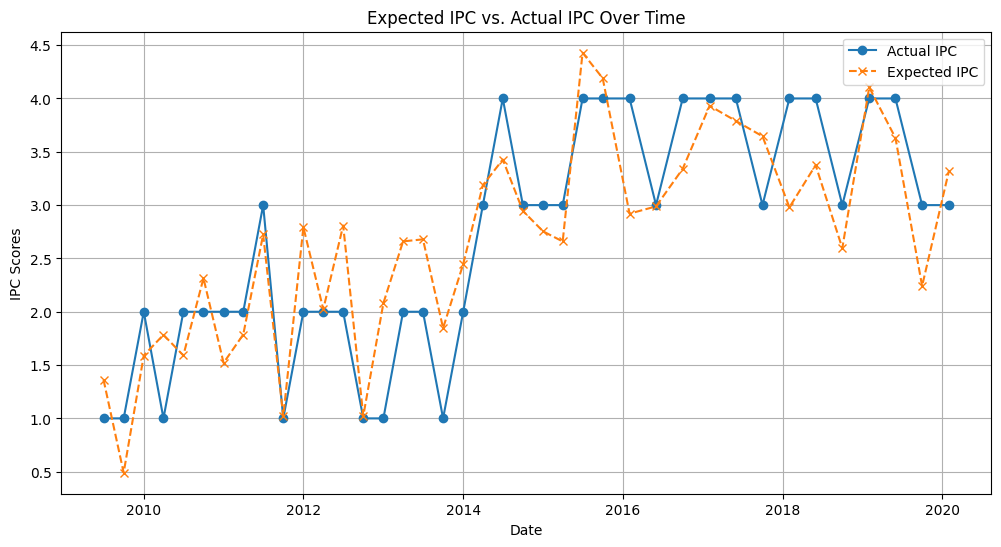

In [328]:
# Predict the IPC values based on the model
y_pred = model.predict(X)

# Create a time series plot to compare expected vs. actual IPC scores
plt.figure(figsize=(12, 6))
plt.plot(df_koch_train['Date'], y, label='Actual IPC', linestyle='-', marker='o')
plt.plot(df_koch_train['Date'], y_pred, label='Expected IPC', linestyle='--', marker='x')

# Add labels, a legend, and a title
plt.xlabel('Date')
plt.ylabel('IPC Scores')
plt.title('Expected IPC vs. Actual IPC Over Time')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# RUBKONA MODEL

In [329]:
rubkona_lagged_columns = []

#create usefull lags
df_rubkona_train = df.loc[df['district'] == "Rubkona"]

#drop not interesting colunmns
df_rubkona_train = df_rubkona_train.drop(columns=['country', 'district_code', 'district', 'centx', 'centy','year_month', 'year', 'month','ha','sum_fatalities', 'food_price_idx', 'area', 'cropland_pct', 'pop','ruggedness_mean', 'pasture_pct', 'conflict_1#', 'conflict_2#'])

for variable in rubkona_lags:
    for lag in rubkona_lags[variable]:
        lag_column = f"{variable}_lag{lag}"
        rubkona_lagged_columns.append(lag_column)
        df_rubkona_train[lag_column] = df_rubkona_train[variable].shift(lag)


#drop all rows with nan
df_rubkona_train = df_rubkona_train.dropna()

df_rubkona_train.head()

,Date,ipc,ndvi_mean,ndvi_anom,rain_mean,rain_anom,et_mean,et_anom,count_violence,total_conflict#,total_conflict#_lag3,total_conflict#_lag4,total_conflict#_lag7,total_conflict#_lag8,total_conflict#_lag9
61,2009-07-01,1.0,0.692777,97.89643,20.214390,-7.316135,19.804530,-4.899284,0,0.0,0.0,0.0,0.0,0.0,0.0
67,2009-10-01,1.0,0.555823,96.17928,13.846280,-0.835450,9.447049,-3.204187,2,0.0,0.0,0.0,0.0,0.0,0.0
73,2010-01-01,1.0,0.285643,90.45458,0.023224,-0.001379,0.034365,-0.452222,1,0.0,0.0,0.0,0.0,0.0,0.0
79,2010-04-01,1.0,0.250217,86.63255,2.260953,-1.296282,0.254411,-0.881110,2,0.0,0.0,0.0,0.0,0.0,0.0
85,2010-07-01,2.0,0.651548,92.07044,27.008700,-0.521829,26.345850,1.642028,0,0.0,0.0,0.0,0.0,0.0,0.0


In [330]:
X= df_rubkona_train[rubkona_lagged_columns]
y= df_rubkona_train['ipc']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.save("regression_model_rubkona")

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ipc   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.9374
Date:                Sun, 15 Oct 2023   Prob (F-statistic):              0.470
Time:                        16:12:00   Log-Likelihood:                -45.744
No. Observations:                  39   AIC:                             103.5
Df Residuals:                      33   BIC:                             113.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.2602 

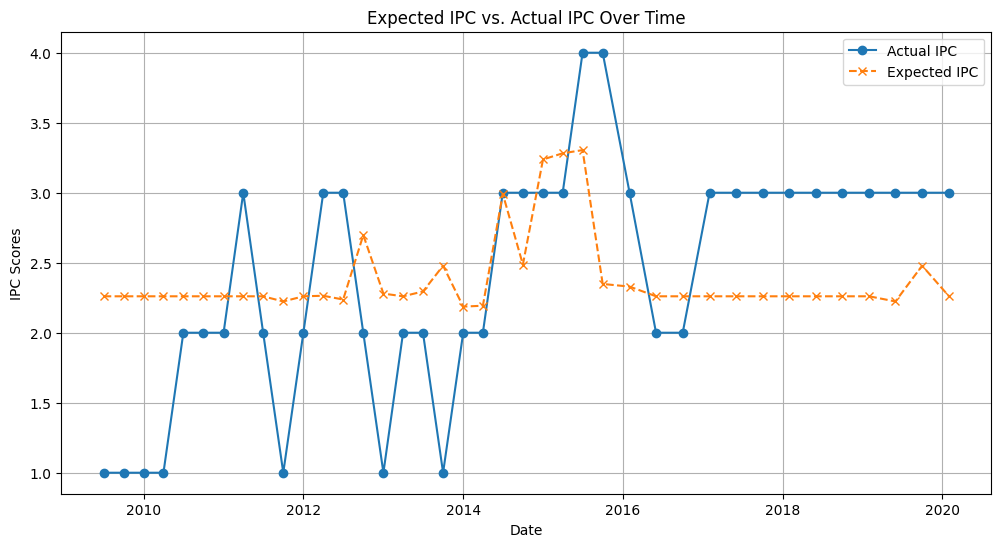

In [331]:
# Predict the IPC values based on the model
y_pred = model.predict(X)

# Create a time series plot to compare expected vs. actual IPC scores
plt.figure(figsize=(12, 6))
plt.plot(df_rubkona_train['Date'], y, label='Actual IPC', linestyle='-', marker='o')
plt.plot(df_rubkona_train['Date'], y_pred, label='Expected IPC', linestyle='--', marker='x')

# Add labels, a legend, and a title
plt.xlabel('Date')
plt.ylabel('IPC Scores')
plt.title('Expected IPC vs. Actual IPC Over Time')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# RUBKONA 2 MODEL

In [332]:
rubkona2_lagged_columns = []

#create usefull lags
df_rubkona2_train = df.loc[df['district'] == "Rubkona"]
df_rubkona2_train = df_rubkona2_train[df_rubkona2_train['year'] < 2014]

#drop not interesting colunmns
df_rubkona2_train = df_rubkona2_train.drop(columns=['country', 'district_code', 'district', 'centx', 'centy','year_month', 'year', 'month','ha','sum_fatalities', 'food_price_idx', 'area', 'cropland_pct', 'pop','ruggedness_mean', 'pasture_pct', 'conflict_1#', 'conflict_2#'])

for variable in rubkona2_lags:
    for lag in rubkona2_lags[variable]:
        lag_column = f"{variable}_lag{lag}"
        rubkona2_lagged_columns.append(lag_column)
        df_rubkona2_train[lag_column] = df_rubkona2_train[variable].shift(lag)


#drop all rows with nan
df_rubkona2_train = df_rubkona2_train.dropna()

df_rubkona2_train.head()

,Date,ipc,ndvi_mean,ndvi_anom,rain_mean,rain_anom,et_mean,et_anom,count_violence,total_conflict#,...,ndvi_mean_lag6,rain_mean_lag6,et_mean_lag1,et_mean_lag2,et_mean_lag6,et_anom_lag6,total_conflict#_lag9,total_conflict#_lag10,total_conflict#_lag11,total_conflict#_lag12
61,2009-07-01,1.0,0.692777,97.89643,20.214390,-7.316135,19.804530,-4.899284,0,0.0,...,0.329198,0.029946,8.392569,2.373245,4.070343,3.583756,0.0,0.0,0.0,0.0
67,2009-10-01,1.0,0.555823,96.17928,13.846280,-0.835450,9.447049,-3.204187,2,0.0,...,0.305708,3.476483,19.775620,29.619790,3.036662,1.901140,0.0,0.0,0.0,0.0
73,2010-01-01,1.0,0.285643,90.45458,0.023224,-0.001379,0.034365,-0.452222,1,0.0,...,0.692777,20.214390,0.075069,1.384632,19.804530,-4.899284,0.0,0.0,0.0,0.0
79,2010-04-01,1.0,0.250217,86.63255,2.260953,-1.296282,0.254411,-0.881110,2,0.0,...,0.555823,13.846280,0.012166,0.013156,9.447049,-3.204187,0.0,0.0,0.0,0.0
85,2010-07-01,2.0,0.651548,92.07044,27.008700,-0.521829,26.345850,1.642028,0,0.0,...,0.285643,0.023224,11.957690,4.656311,0.034365,-0.452222,0.0,0.0,0.0,0.0


In [333]:
X= df_rubkona2_train[rubkona2_lagged_columns]
y= df_rubkona2_train['ipc']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.save("regression_model_rubkona2")

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ipc   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     3.442
Date:                Sun, 15 Oct 2023   Prob (F-statistic):             0.0908
Time:                        16:12:01   Log-Likelihood:                0.61933
No. Observations:                  18   AIC:                             24.76
Df Residuals:                       5   BIC:                             36.34
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.50

c:\Users\20202182\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


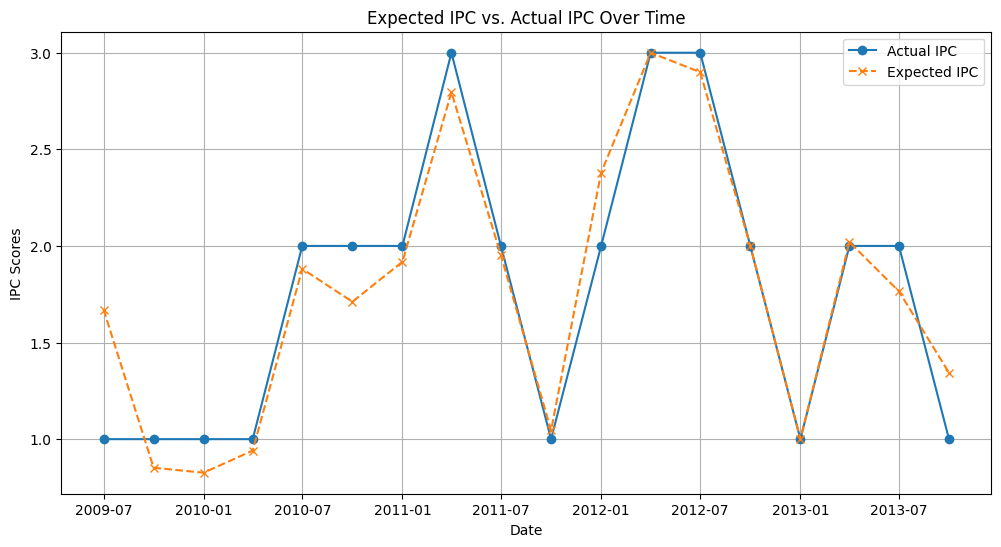

In [334]:
# Predict the IPC values based on the model
y_pred = model.predict(X)

# Create a time series plot to compare expected vs. actual IPC scores
plt.figure(figsize=(12, 6))
plt.plot(df_rubkona2_train['Date'], y, label='Actual IPC', linestyle='-', marker='o')
plt.plot(df_rubkona2_train['Date'], y_pred, label='Expected IPC', linestyle='--', marker='x')

# Add labels, a legend, and a title
plt.xlabel('Date')
plt.ylabel('IPC Scores')
plt.title('Expected IPC vs. Actual IPC Over Time')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()